# MMP tracking 

This program helps to track MMPs or any kind of smaller objects from the video. Here our aim is to find the activation time and velocity of MMPs.

I am inspired by the code from the following github. If you are publishing any of your work by using this software, please give reference to the following work. 
https://github.com/soft-matter/trackpy (trackpy)
https://github.com/soft-matter/pims (pims)
    

In [1]:
from __future__ import division, unicode_literals, print_function        # for compatibility with python 2 and 3
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline                                   
# for interactive plotting
mpl.rc('figure', figsize=(10,5))
mpl.rc('image', cmap='grey')

In [2]:
import numpy as np
import pandas as pd
import pims
import trackpy as tp
from pandas import DataFrame, Series

##  Read the data

In [3]:
@pims.pipeline
def gray(image):
    return image[:, :, 0]   # just take one color in RGB

frames = gray(pims.open('dummy.png',  vmin=0, vmax=255))


In [4]:
frames

(ImageReader,) processed through proc_func. Original repr:
    <Frames>
    Length: 1 frames
    Frame Shape: 832 x 1359
    Pixel Datatype: uint8

In [5]:
print(frames[0])

[[101 101 101 ...   1   0   0]
 [101 101 101 ...   1   1   0]
 [101 101 101 ...   2   1   1]
 ...
 [  5   5   4 ... 186 186 186]
 [  8   8   7 ... 186 186 187]
 [  8   8   8 ... 186 186 186]]


In [6]:
type(frames[0])

pims.frame.Frame

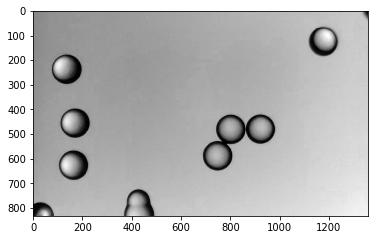

In [7]:
plt.imshow(frames[0], cmap='gray');

## Locating the feature

In [8]:
f = tp.locate(frames[0],(51,51), invert=True)

In [9]:
print(f.shape)
f.head()


(129, 9)


,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,28.603838,888.133486,1297.981806,14.290947,0.250527,3.346272,234251.0,0.549328,0
1,29.177001,790.042804,1606.954273,16.319505,0.200606,3.346272,241256.0,0.358793,0
2,41.574751,1007.524585,1119.142147,17.103952,0.316867,3.346272,225967.0,1.476714,0
3,33.774966,176.292510,2204.077957,16.102897,0.353897,4.461696,278073.0,0.127097,0
4,61.246721,46.529324,1502.476219,15.711895,0.316047,2.974464,289003.0,0.106651,0


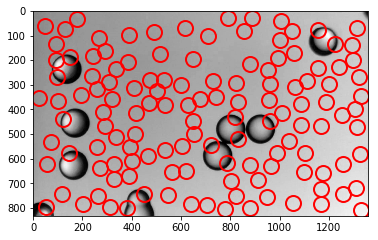

In [10]:
tp.annotate(f, frames[0])

[Text(0, 0.5, 'count'), Text(0.5, 0, 'mass')]

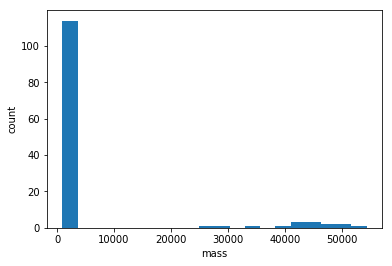

In [11]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

ax.set(xlabel='mass', ylabel='count')

In [12]:
f= tp.locate(frames[0], (51,51), invert=True,  noise_size=42, separation=60, threshold=22)
# play with the above parameters to selection the feature separation, threshold value of the bightness, inverting boolean values, changing noise values to get optimum location of your desired item
f.shape

(7, 9)

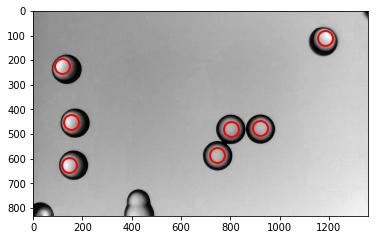

In [13]:
tp.annotate(f, frames[0]);

## Hurray.... our program locating the particles correctly. :)